In [215]:
import seaborn

In [174]:
import numpy as np
import scipy
from dist_rsa.utils.load_data import *
from dist_rsa.utils.helperfunctions import *

vec_size,vec_kind = 300,'glove.6B.'
vecs = load_vecs(mean=True,pca=False,vec_length=vec_size,vec_type=vec_kind) 

def normalize(vec):
	return vec / np.linalg.norm(vec)

normed_vicious = normalize(vecs['vicious'])
normed_swims = normalize(vecs['swims'])


def check_case(qud1,qud2,utt1,utt2):

	qud1vec = normalize(vecs[qud1])
	qud2vec = normalize(vecs[qud2])

	utt1vec = vecs[utt1]
	utt2vec = vecs[utt2]

	utt1_on_qud1 = np.dot(utt1vec,qud1vec)
	utt1_on_qud2 = np.dot(utt1vec,qud2vec)
	utt2_on_qud1 = np.dot(utt2vec,qud1vec)
	utt2_on_qud2 = np.dot(utt2vec,qud2vec)
	print("\n\n")
	print(utt1,"along",qud1, utt1_on_qud1)
	print(utt1,"along",qud2, utt1_on_qud2)
	print(utt2,"along",qud1, utt2_on_qud1)
	print(utt2,"along",qud2, utt2_on_qud2)

	print(utt1+" along "+qud1+" > "+utt2+" along "+qud1, utt1_on_qud1>utt2_on_qud1)
	print(utt2+" along "+qud2+" > "+utt1+" along "+qud2, utt2_on_qud2>utt1_on_qud2)

check_case(utt1='shark',utt2='swimmer',qud1='vicious',qud2='swims')
check_case(utt1='ox',utt2='rabbit',qud1='stubborn',qud2='timid')




loading vecs (load vecs): glove.6B.mean_vecs300



shark along vicious 2.137791525700251
shark along swims 2.721600020729998
swimmer along vicious 1.1271553380323376
swimmer along swims 3.673510158157221
shark along vicious > swimmer along vicious True
swimmer along swims > shark along swims True



ox along stubborn 1.2445788239541469
ox along timid 1.2209566321071204
rabbit along stubborn 0.9636451728692469
rabbit along timid 1.594107055013214
ox along stubborn > rabbit along stubborn True
rabbit along timid > ox along timid True


In [175]:
from dist_rsa.utils.load_data import imported_adjs

In [252]:
vecs["foo"]=np.zeros((300))
vecs["foo"][0]=1
vecs["bar"]

In [253]:
vecs["foo"]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [260]:
def averages(heatmap):

    averages=[]
    for i in range(heatmap.shape[0]):
        out = list(np.argsort(-heatmap[:,i])).index(i)
        averages.append(out)
    
    return averages

def data(which_adjective):
    animal_to_attribute = {}
    animal_features = []
    animals = []
    for i in range(len(imported_adjs)):
        if i%7 == 0:
            animals.append(imported_adjs[i])
        if i%7 != 0:
            animal_features.append(imported_adjs[i])
    for i,animal in enumerate(animals):
        animal_to_attribute[animal]=animal_features[i*6+which_adjective]
    #     print(animal,animal_features[i*6])
    # print(animal_features)
    animals,attributes = zip(*animal_to_attribute.items())
    
    projection_heatmap = np.zeros([len(animals),len(animals)])
    for i,animal in enumerate(animals):
        for j,attribute in enumerate(attributes):
            qudvec = normalize(vecs[attribute])
            uttvec = vecs[animal]
            utt_on_qud = np.dot(uttvec,qudvec)
    #         print(utt_on_qud)
            projection_heatmap[i,j]=utt_on_qud
        
    cosine_heatmap = np.zeros([len(animals),len(animals)])
    for i,animal in enumerate(animals):
        for j,attribute in enumerate(attributes):
            utt1vec = vecs[attribute]
            utt2vec = vecs[animal]
            dist = scipy.spatial.distance.cosine(utt1vec,utt2vec)
            cosine_heatmap[i,j]=-dist
            
    print(averages(cosine_heatmap))
    print(averages(projection_heatmap))
    
#     print(cosine_heatmap)
#     print("BREAK\n\n")
#     print(projection_heatmap)
#     chance=(averages(np.random.rand(len(animals),len(attributes))))
#     print(np.mean(chance))
#     print(cosine_heatmap)
#     print(projection_heatmap)


# attributes
data(0)
data(1)
data(2)


[12, 10, 29, 7, 7, 24, 13, 1, 6, 8, 5, 9, 13, 21, 25, 22, 18, 8, 3, 0, 10, 0, 1, 21, 18, 10, 0, 0, 1, 1, 8, 2]
[17, 18, 27, 6, 7, 25, 9, 1, 6, 11, 11, 9, 7, 22, 26, 21, 20, 8, 2, 0, 8, 0, 0, 23, 18, 5, 0, 1, 5, 1, 8, 1]
[9, 19, 13, 25, 6, 27, 1, 0, 13, 1, 10, 17, 25, 6, 25, 8, 17, 23, 1, 0, 6, 2, 4, 4, 0, 0, 3, 22, 25, 12, 12, 0]
[11, 20, 13, 24, 6, 27, 0, 0, 13, 2, 15, 16, 22, 6, 28, 8, 17, 25, 1, 0, 5, 2, 2, 5, 0, 0, 5, 27, 24, 13, 12, 0]
[2, 26, 21, 26, 20, 27, 2, 1, 14, 3, 2, 16, 12, 27, 29, 0, 16, 0, 1, 0, 12, 4, 3, 3, 2, 14, 16, 29, 12, 5, 6, 0]
[2, 27, 19, 25, 20, 27, 0, 1, 13, 7, 5, 16, 8, 28, 30, 0, 19, 0, 0, 0, 11, 3, 1, 3, 2, 10, 15, 29, 15, 8, 6, 1]


In [214]:
def averages(heatmap):

    averages=[]
    for i in range(heatmap.shape[0]):
        print("animal",animals[i])
        print("true",attributes[i])
        
        print("predicted",attributes[np.argmax(heatmap[i,:])])
#         print(heatmap[i,:])
        out = list(np.argsort(-heatmap[i,:])).index(i)
        print("rank",out)
        averages.append(out)
    
    return np.mean(averages)

print(averages(cosine_heatmap))
# print(np.mean(averages))

# print(averages)
# seaborn.distplot(averages)
# seaborn.barplot(averages)
#     print(np.argsort(heatmap[i,:]))
#     break

animal monkey
true smart
predicted big
rank 23
animal goat
true hungry
predicted fat
rank 9
animal penguin
true cute
predicted cute
rank 1
animal bee
true small
predicted big
rank 2
animal shark
true dangerous
predicted big
rank 5
animal ant
true strong
predicted small
rank 25
animal fish
true wet
predicted small
rank 9
animal bear
true big
predicted big
rank 0
animal cow
true dumb
predicted big
rank 25
animal cat
true lazy
predicted big
rank 12
animal wolf
true mean
predicted big
rank 8
animal bat
true blind
predicted big
rank 10
animal whale
true graceful
predicted big
rank 25
animal kangaroo
true bouncy
predicted big
rank 18
animal ox
true big
predicted big
rank 0
animal duck
true cute
predicted big
rank 6
animal goose
true mean
predicted big
rank 5
animal owl
true quiet
predicted blind
rank 15
animal horse
true strong
predicted big
rank 4
animal dog
true friendly
predicted big
rank 12
animal sheep
true fluffy
predicted small
rank 16
animal fox
true smart
predicted big
rank 10
anima

In [140]:
averages=[]
for i in range(heatmap.shape[0]):
#     print("attribute",attributes[i])
#     print("true",animals[i])
#     print("predicted",animals[np.argmax(heatmap[:,i])])
    out = list(np.argsort(-heatmap[:,i])).index(i)
#     print(out)
    averages.append(out)

print(np.mean(averages))
#     print(np.argsort(heatmap[i,:]))
#     break

10.96875


In [70]:
def check(i,j):
    
    print(animals[i])
    print(attributes[j])
    print(heatmap[i,j])

    qudvec = normalize(vecs[attributes[j]])
    uttvec = vecs[animals[i]]
    utt_on_qud = np.dot(uttvec,qudvec)
    print(utt_on_qud)

check(5,5)

ant
small
2.189888855747192
2.189888855747192


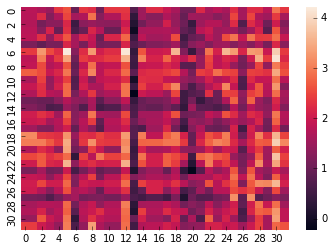

In [83]:
%matplotlib inline
import seaborn as sns
ax = sns.heatmap(heatmap)
import pandas as pd


In [97]:
for i in range(heatmap.shape[0]):
    animal = animals[i]
    print(animal)
#     print(len(attributes))
    best = attributes[np.argmax(heatmap[i])]
    true = animal_to_attribute[animal]
    print("best adj",best, np.dot(normalize(vecs[best]),vecs[animal]))
    print("true adj",true, np.dot(normalize(vecs[true]),vecs[animal]))
    
#     print("best",)
#     print("true",np.dot(normalize(vecs[true]),vecs[animal]))
#     print(np.argmax(heatmap[i]))
    

monkey
best adj big 2.9253706386498535
true adj funny 1.7925683128699654
goat
best adj fat 2.8922332116672447
true adj funny 1.777918213204892
penguin
best adj striped 2.23686651343958
true adj cold 1.1282092607168352
bee
best adj big 2.6256035663787203
true adj busy 2.12966541210151
shark
best adj striped 2.9298732459163417
true adj scary 2.1625962507168652
ant
best adj small 2.189888855747192
true adj small 2.189888855747192
fish
best adj small 4.222568026489201
true adj scaly 1.2925724937865632
bear
best adj big 4.121717545411356
true adj scary 2.4149981199404285
cow
best adj big 2.9791505146721944
true adj fat 2.877913243984328
cat
best adj big 3.444635312456515
true adj independent 1.8127861640135348
wolf
best adj big 2.8800238927275057
true adj scary 1.9705638215770704
bat
best adj big 3.2637695176220776
true adj scary 2.1021201216303256
whale
best adj large 2.9140362691542987
true adj large 2.9140362691542987
kangaroo
best adj striped 2.7625495829040463
true adj jumpy 0.43535414

In [88]:
# heatmap
mat = pd.DataFrame((heatmap),columns=attributes,index=animals)

In [98]:
mat

,funny,funny,cold,busy,scary,small,scaly,scary,fat,independent,...,free,smart,fast,striped,slimy,striped,huge,ferocious,big,dirty
monkey,1.792568,1.792568,1.681534,1.480188,2.357706,2.602407,0.973229,2.357706,2.243710,1.044273,...,1.624251,1.820838,1.622975,2.247372,1.588569,2.247372,2.229375,1.794204,2.925371,2.361001
goat,1.777918,1.777918,2.225992,1.255484,1.703803,2.499860,1.595036,1.703803,2.892233,1.292157,...,1.507521,1.279521,1.463519,2.488558,1.583956,2.488558,1.675901,1.534901,2.396868,1.609770
penguin,1.728037,1.728037,1.128209,1.328030,1.329913,2.184909,0.476978,1.329913,1.478690,1.359253,...,1.764137,1.758494,1.429099,2.236867,0.718225,2.236867,1.864707,1.036648,2.033126,1.242886
bee,1.807713,1.807713,1.294466,2.129665,0.967273,2.277162,0.630126,0.967273,2.164913,1.753167,...,2.010884,1.497896,1.583613,1.535077,1.116942,1.535077,2.119794,0.786528,2.625604,1.456865
shark,1.839964,1.839964,2.290545,1.412898,2.162596,2.655797,1.598904,2.162596,1.919737,0.987551,...,1.851764,1.510450,2.572050,2.929873,1.935696,2.929873,2.393290,2.411164,2.883409,1.935505
ant,1.181200,1.181200,0.900998,1.150947,1.137816,2.189889,1.606166,1.137816,1.848961,1.093335,...,1.248177,1.525027,1.561278,1.274024,1.520671,1.274024,1.661778,1.138023,2.174637,1.307945
fish,2.393497,2.393497,3.276065,2.552044,2.246915,4.222568,1.292572,2.246915,3.290880,2.058495,...,2.907745,2.120012,3.602732,3.311470,2.158302,3.311470,3.238761,1.974082,3.861829,2.390269
bear,1.857341,1.857341,2.991853,1.888492,2.414998,3.419117,1.060019,2.414998,2.216139,2.250531,...,2.517584,1.839978,2.161255,2.050187,1.125683,2.050187,3.500362,2.385719,4.121718,2.200752
cow,1.894933,1.894933,2.522195,1.726864,1.909773,2.642031,0.884922,1.909773,2.877913,1.791978,...,2.429768,1.857699,2.002574,1.458470,1.069537,1.458470,2.494551,1.389653,2.979151,2.451057
cat,2.719466,2.719466,2.566190,1.959908,2.187160,2.942886,1.005929,2.187160,3.101583,1.812786,...,2.303393,2.878461,2.536952,2.452277,1.345620,2.452277,2.404190,2.308921,3.444635,2.604823


In [96]:
writer = pd.ExcelWriter('output.xlsx')
mat.to_excel(writer,'Sheet1')
writer.save()